# Simple Linear Regression Modelling

Linear regression is a statistical technique that aims to model the relationship between a dependent variable (in this case, property prices) and one or more independent variables (such as location, square footage, number of bedrooms, etc.). The goal is to develop a linear equation that can predict the dependent variable based on the given independent variables. By analyzing the dataset, we can identify the most significant predictors of property prices and estimate their respective impact.

In the context of real estate analysis, the dependent variable could be the housing price, while the independent variables may include factors such as location, size, number of bedrooms, proximity to amenities, and more. By fitting a line to the data points, linear regression helps us understand how changes in the independent variables affect the dependent variable.

# About the data

# Data Preprocessing

Before delving into the regression analysis, it is crucial to preprocess the data. This involves handling missing values, removing outliers, normalizing variables, and encoding categorical variables. By ensuring the data is clean and standardized, we can obtain reliable results from our analysis.

For our analysis, we selected a comprehensive real estate dataset containing information on various attributes of properties, such as location, size, number of rooms, age, and price. Before proceeding with regression analysis, it is crucial to preprocess the dataset by handling missing values, removing outliers, and normalizing variables to ensure accurate results.

In [2]:
#import necessary libraries
import pandas as pd

data=pd.read_csv("data.csv")


We can get a general impression of what our dataset looks like by looking at the first few rows of the data.

In [3]:
#display the first five rows of the dataset
data.head(5)

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2


To check the toal number of rows and columns, we can use the shape method.

In [4]:
data.shape

(511, 14)

To get some statistical information for each column of the dataset, we use the describe method. The information provided by the describe method includes count, mean, standard deviation, the minimum and maximum values, the 1st and 3rd quartiles (25% & 30% respectively) as well as the median value (50%) of the data in each column.

In [6]:
data.describe()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
count,511.000000,511.000000,511.000000,511.000000,511.000000,506.000000,511.000000,511.000000,511.000000,511.000000,511.000000,511.000000,511.000000,511.000000
mean,3.584139,11.252446,11.151096,0.068493,0.554757,6.287589,68.616243,3.783876,9.485323,407.440313,18.500000,356.600900,12.879550,22.682192
std,8.564433,23.234838,6.828175,0.252838,0.115310,0.703802,28.099130,2.098631,8.688469,167.903532,2.200348,90.882679,7.797416,9.484262
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000,5.000000
25%,0.082325,0.000000,5.190000,0.000000,0.449000,5.885500,45.050000,2.100350,4.000000,279.500000,17.400000,374.710000,7.065000,17.050000
50%,0.261690,0.000000,9.690000,0.000000,0.538000,6.209000,77.300000,3.152300,5.000000,330.000000,19.100000,391.340000,11.450000,21.200000
75%,3.621175,12.500000,18.100000,0.000000,0.624000,6.629750,94.050000,5.118000,24.000000,666.000000,20.200000,396.210000,17.105000,25.000000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,23.000000,396.900000,76.000000,67.000000


Next, we check for missing data in the dataset. Using the count method, we can identify column(s) with missing values.

In [7]:
data.count()

CRIM       511
ZN         511
INDUS      511
CHAS       511
NOX        511
RM         506
AGE        511
DIS        511
RAD        511
TAX        511
PTRATIO    511
B          511
LSTAT      511
MEDV       511
dtype: int64

A quick look at the values provided for the count for each column, we can see that the 'RM' column has 506 values. This indicates there are a total of 5 missing values from this column. It is common practice to replace the missing data with the mean, median, mode etc., of the column of interest. We can achieve this using the fillna method as follows.

In [8]:
data['RM']=data['RM'].fillna(data['RM'].mean())

data['RM'].count()

511

# Exploratory Data Analysis (EDA)

EDA is an essential step in any data analysis process. By visualizing the dataset through plots, graphs, and statistical summaries, we can gain preliminary insights into the relationships between variables. EDA helps identify correlations, patterns, and potential outliers, which guide our subsequent regression analysis.

# Correlation Coefficient

The correlation coefficient is a statistical measure that quantifies the strength and direction of the relationship between two variables. It is denoted by the symbol "r" and takes values between -1 and +1.

The correlation coefficient measures the degree to which the variables move together or vary inversely. A positive correlation coefficient indicates a direct or positive relationship, meaning that as one variable increases, the other tends to increase as well. Conversely, a negative correlation coefficient represents an inverse or negative relationship, where as one variable increases, the other tends to decrease.

The value of the correlation coefficient ranges from -1 to +1. A correlation coefficient of +1 represents a perfect positive correlation, indicating that the variables have a strong linear relationship and move in perfect harmony. A correlation coefficient of -1 represents a perfect negative correlation, indicating that the variables have a strong inverse relationship and move in opposite directions. A correlation coefficient of 0 suggests no linear relationship between the variables.

Let us find the correlation between Median value of owner-occupied homes in $1000's and all other features in the dataset.

In [9]:
#Correlations of features with target variable
correlations=data.corr()
correlations['MEDV']

CRIM      -0.380072
ZN         0.339767
INDUS     -0.463269
CHAS       0.164782
NOX       -0.411486
RM         0.666954
AGE       -0.368203
DIS        0.233469
RAD       -0.379016
TAX       -0.459274
PTRATIO   -0.447464
B          0.317941
LSTAT     -0.562960
MEDV       1.000000
Name: MEDV, dtype: float64

Let us remove features that have negative correlation with 'MEDV'

In [10]:
#remove features with negative correlation
cor_target=correlations['MEDV']

removed_features = cor_target[cor_target<0]
removed_features

CRIM      -0.380072
INDUS     -0.463269
NOX       -0.411486
AGE       -0.368203
RAD       -0.379016
TAX       -0.459274
PTRATIO   -0.447464
LSTAT     -0.562960
Name: MEDV, dtype: float64

A quick look at the positive correlations show that the feature with the highest correlation is 'RM'. 

Text(0.5, 1.0, 'Scatter Diagram of RM vs MEDV')

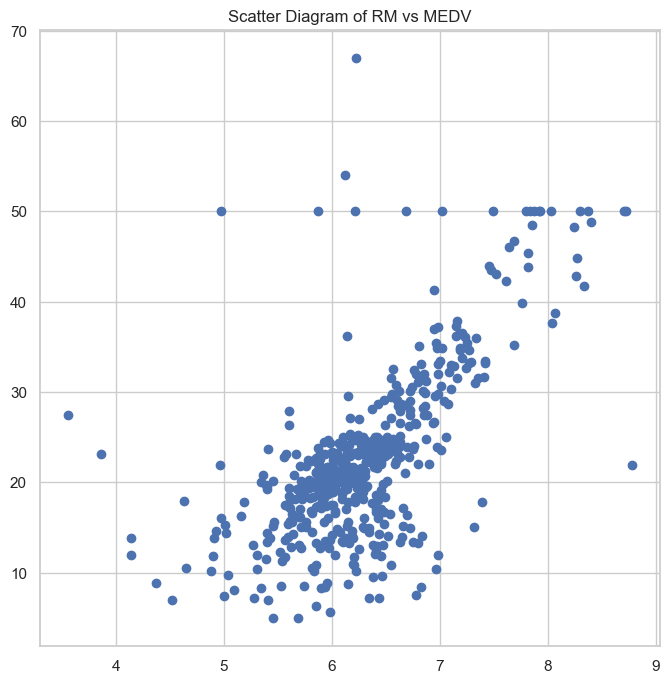

In [21]:
import matplotlib.pyplot as plt
%matplotlib inline

fig_1=plt.figure(figsize=(8,8))
plt.scatter(data['RM'], data['MEDV'])
plt.title('Scatter Diagram of RM vs MEDV')

Drop the features with negative correlation from the dataset

In [11]:
data=data.drop(['CRIM','INDUS','NOX','AGE', 'RAD', 'TAX', 'PTRATIO', 'LSTAT'], axis=1)

# Pearson's Correlation Matrix

Pearson's correlation matrix is a mathematical tool used to measure the linear relationship between pairs of variables in a dataset. It is named after Karl Pearson, who developed the correlation coefficient.

A correlation matrix is a table that displays the correlation coefficients between all possible pairs of variables in a dataset. It is a square matrix, where each row and column represent a different variable. The value in each cell of the matrix represents the correlation coefficient between the variables corresponding to the row and column.

The correlation matrix is useful for understanding the relationships between variables and identifying patterns or dependencies in the data. It can help in tasks such as feature selection, identifying high correlation between predictor variables, and exploring associations between variables.

Text(0.5, 1.0, 'Pearson Correlation Matrix')

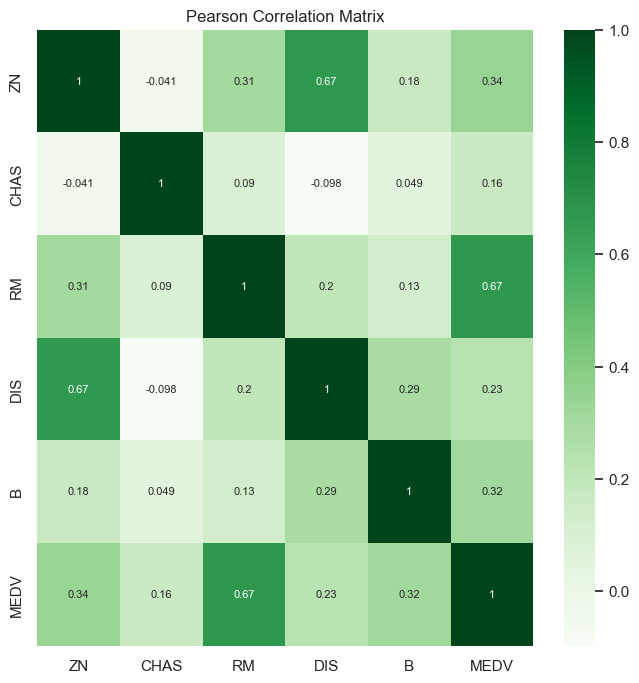

In [22]:
#plot Pearson correlation matrix

import seaborn as sns

fig_2=plt.figure(figsize=(8,8))
new_correlations=data.corr()
sns.heatmap(new_correlations, annot=True, cmap='Greens', annot_kws={'size':8})
plt.title('Pearson Correlation Matrix')


# Regression Modeling

Once the data is prepared, we can construct our regression model. By selecting relevant independent variables that are likely to influence property prices, we can estimate their impact through regression coefficients. The model will help us understand the relationship between these variables and the target variable in a quantifiable manner.

In [23]:
from sklearn.model_selection import train_test_split

X = data.drop(['ZN', 'CHAS', 'DIS', 'B', 'MEDV'], axis=1)
y = data['MEDV']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1)

In [24]:
from sklearn.linear_model import LinearRegression

model=LinearRegression()
model.fit(X_train, y_train)


LinearRegression()

In [25]:
y_pred=model.predict(X_test)

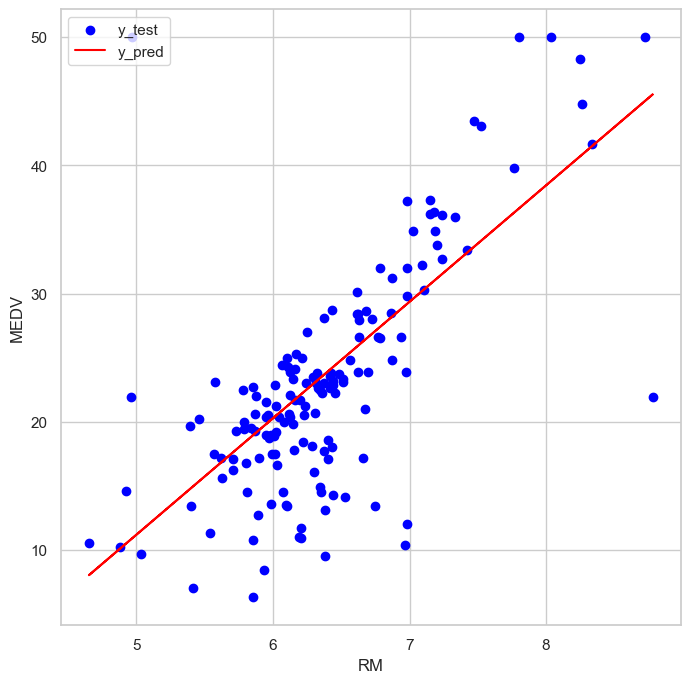

In [30]:
fig_1=plt.figure(figsize=(8,8))
plt.scatter(X_test, y_test, color='blue',label='y_test')
plt.plot(X_test, y_pred, color='red', label='y_pred')
plt.xlabel('RM')
plt.ylabel('MEDV')
plt.legend(loc="upper left")


# Evaluating Model Performance

The skill or performance of a regression model must be reported as an error in those predictions. Errpr summarizes how close predictions were to their expected values.

There are three error metrics that are commonly used for evaluating and reporting the performance of a regression model; they are:

Mean Squared Error (MSE)
Root Mean Squared Error (RMSE)
Mean Absolute Error (MAE)

# Mean Squared Error

Mean squared error (MSE) is a commonly used metric to measure the average squared difference between the predicted and actual values in a regression problem. It is a way to assess the accuracy of a regression model by quantifying the average of the squared residuals (the differences between predicted and actual values).

To calculate the MSE, you take the squared difference between each predicted value and its corresponding actual value, sum them up, and divide by the total number of data points.

MSE is useful because it gives more weight to larger errors due to squaring the differences. This property makes it particularly sensitive to outliers. Additionally, MSE is a non-negative value, with a lower value indicating a better fit of the model to the data.

In [35]:

from sklearn.metrics import mean_squared_error

mean_squared_error(y_test, y_pred)

42.41029423467071

# Root Mean Squared Error

Root mean squared error (RMSE) is a commonly used metric to measure the average magnitude of the residuals or errors in a regression problem. It is derived from the mean squared error (MSE) by taking the square root of the MSE. RMSE is often preferred over MSE because it is in the same unit as the dependent variable, making it more interpretable.

To calculate the RMSE, you first calculate the MSE using the formula for MSE and then take the square root of the MSE.

RMSE provides a measure of the average magnitude of the prediction errors in the original units of the dependent variable. It is particularly useful when you want to understand the typical size of the errors made by a regression model. Like MSE, a lower value of RMSE indicates a better fit of the model to the data.

In [37]:
#root mean squared error
mean_squared_error(y_test, y_pred, squared=False)

6.512318652728129

# Mean Absolute Error

Mean Absolute Error (MAE) is a metric used to measure the average absolute difference between the predicted and actual values in a regression problem. Unlike mean squared error (MSE) or root mean squared error (RMSE), MAE focuses on the absolute values of the errors rather than squaring them.

To calculate the MAE, you take the absolute difference between each predicted value and its corresponding actual value, sum them up, and divide by the total number of data points.

MAE provides a measure of the average magnitude of the errors made by a regression model. It is useful when you want to understand the typical size of the errors in the original units of the dependent variable. MAE is less sensitive to outliers compared to MSE or RMSE because it does not involve squaring the errors.

In [40]:
from sklearn.metrics import mean_absolute_error
mean_absolute_error(y_test, y_pred)

4.264390531131601